In [73]:
import h5py
from pathlib import Path
import os
import tensorflow as tf


In [74]:
root = Path.cwd()
experiment = 'nano-4'
weight_file = None
look_for = 'best_acc'

for file in (root / experiment).iterdir():
    if look_for not in file.name:
        continue
    weight_file = file
print(weight_file)

c:\Users\otkul\ETH\vår\project\experiments\q-nano-pelican\nano-4\best_acc.weights.h5


In [75]:
# load model
from keras import models
from qkeras.utils import load_qmodel
from model import CreateModel
import yaml
import numpy as np
def load_yaml(filename):
    with open(filename, "r") as stream:
        config = yaml.load(stream, Loader=yaml.Loader)
    return config

conf = load_yaml(root / experiment / 'config.yml')
print(conf)

const = tf.shape(np.zeros((10, 4)))

my_model = CreateModel(const, conf['model'])


{'dataset': {'feature_key': 'Pmu', 'folder': '../../data/nano_data', 'label_key': 'is_signal', 'num_particles': 32}, 'hyperparams': {'batch_size': 512, 'epochs': 1000, 'lr_init': 0.01, 'patience': 15, 'val_size': -1, 'verbose': 1}, 'model': {'activation': 'relu', 'inner_product': {'data_format': 'epxpypz', 'spurions': False}, 'n_bits': 8, 'n_hidden': 2, 'n_outputs': 1, 'num_avg': 25, 'out_activation': 'linear'}, 'save_dir': 'nano', 'seed': 545944663}


In [76]:
my_model.load_weights(str(weight_file))

c:\Users\otkul\anaconda3\envs\keras2\Lib\site-packages\keras\src\constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


In [77]:


bnorms = []
denses = []
for layer in my_model.layers:
    print(layer.name)
    if 'batch_norm' in layer.name:
        bnorms.append(layer)
    if 'dense' in layer.name:
        denses.append(layer)
print(bnorms)
print(denses)

input_15
inner_product_6
q_batch_normalization_10
lineq2v2_5
q_dense_10
multiply_5
q_activation_5
q_batch_normalization_11
lineq2v0_5
q_dense_11
activation_5
[<qkeras.qnormalization.QBatchNormalization object at 0x0000021A5316C290>, <qkeras.qnormalization.QBatchNormalization object at 0x0000021A52B84ED0>]
[<qkeras.qlayers.QDense object at 0x0000021A53083B10>, <qkeras.qlayers.QDense object at 0x0000021A5340C550>]


In [85]:
bnorm1 = bnorms[1]
weights = [w for w in bnorm1.weights]
names = [w.name for w in weights]

elems = {}
for idx, name in enumerate(names):
    if 'mean' in name:
        elems['mean'] = weights[idx].numpy()
    if 'var' in name:
        elems['var'] = weights[idx].numpy()
    if 'gamma' in name:
        elems['weight'] = weights[idx].numpy()
    if 'beta' in name:
        elems['bias'] = weights[idx].numpy()

batch = np.array((elems['mean'], elems['weight']/np.sqrt(elems['var']), elems['bias']))
print(batch)

for k, v in elems.items():
    print(k, v)

[[ 0.5610447  0.5056122]
 [ 2.104964   2.2404537]
 [ 0.6903273 -0.284152 ]]
weight [1. 1.]
bias [ 0.6903273 -0.284152 ]
mean [0.5610447 0.5056122]
var [0.22568916 0.19921777]


In [48]:
from pathlib import Path
import h5py
nconst=8
n_int=0
n_bits=10
num = 0

filename = Path(f'nconst{nconst}-nint{n_int}-nbits{n_bits}-{num}')
# filename = Path('nano-nh2-nconst32-nint2-nbits8-0')
weights = h5py.File(filename / 'best_acc.weights.h5')



In [49]:
import numpy as np
for k, v in weights.items():
    if 'layer' not in k:
        continue
    print(k)
    print('---------')

    if 'vars' not in v:
        continue

    v = v['vars']
    for i, j in v.items():
        print(i, np.array(j))


_layer_checkpoint_dependencies\activation
---------
_layer_checkpoint_dependencies\inner_product
---------
_layer_checkpoint_dependencies\input_layer
---------
_layer_checkpoint_dependencies\lineq2v0
---------
0 2.8044567
_layer_checkpoint_dependencies\lineq2v2
---------
0 10.414902
_layer_checkpoint_dependencies\q_activation
---------
_layer_checkpoint_dependencies\q_batch_normalization
---------
0 [0.04167621]
1 [-0.06809629]
2 [37.60376]
3 [11309.849]
_layer_checkpoint_dependencies\q_batch_normalization_1
---------
0 [0.87324494 1.        ]
1 [-0.04911453  0.21335994]
2 [0.10199631 0.48902318]
3 [0.04719022 0.08578406]
_layer_checkpoint_dependencies\q_dense
---------
0 [[-0.01195063 -0.6010795 ]
 [-0.1485838   0.06974085]
 [ 0.7315691  -0.29519188]
 [-0.5916678  -0.18088925]
 [-0.19097368  0.13847739]
 [-1.          0.11391481]
 [ 0.272981    0.28903875]]
1 [-0.04708839  0.70848024]
_layer_checkpoint_dependencies\q_dense_1
---------
0 [[-0.27494466  0.41528156  0.32843423  0.2227415

In [21]:
string = 'nconst8-nint1-nbits24'
res = string.split('-')
n_int = int(res[1][4:])
n_bits = int(res[2][5:])

print(n_int, n_bits)

1 24


[[ 2.          0.3178    ]
 [ 4.          0.32149413]
 [ 6.          0.44707647]
 [ 8.          0.45231175]
 [10.          0.45722353]
 [12.          0.45732352]
 [14.          0.45717648]
 [16.          0.45934707]
 [24.          0.45951766]]
[[ 8.          0.44871175]
 [10.          0.4711    ]
 [16.          0.4639412 ]]


([<matplotlib.axis.XTick at 0x1f0eb0a1f10>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24')])

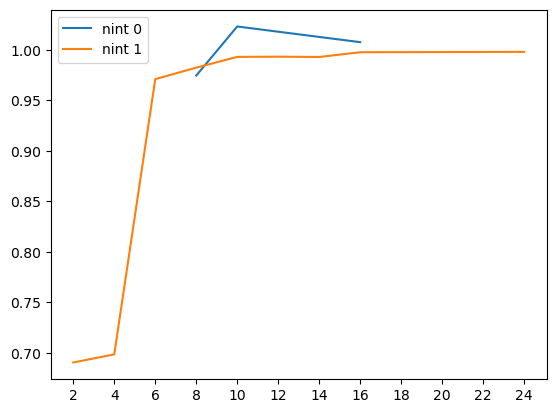

In [42]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

ALLBEST = 0.4603706
name = 'nconst8-nint1'
def get_res(name):
    results = {}
    for file in Path.cwd().iterdir():
        if name not in file.name[:len(name)]:
            continue

        n_bits = int(file.name.split('-')[2][len('nbits'):])
        try:
            res = pd.read_csv(file / 'eval' / 'result.csv')['cat_acc'][0]
            prev_res = results.get(n_bits, 0)
            results[n_bits] = max(prev_res, res)
        except FileNotFoundError:
            continue

    arr = np.array(sorted(results.items()))
    print(arr)
    return arr[:, 0], arr[:, 1]

x1, y1 = get_res('nconst8-nint1')
x0, y0 = get_res('nconst8-nint0')
plt.plot(x0, y0/ALLBEST, label='nint 0')
plt.plot(x1, y1/ALLBEST, label='nint 1')
plt.legend()
plt.xticks(np.arange(2, 25, step=2))

